# Amides and Acyl Chlorides

The final example I investigated was the difference in reactivity between amides and acyl chlorides. While amides and acyl chlorides are both carboxylic acid derivatives with similar structures, acyl chlorides react readily with nucleophiles, amides do not. Again, conjugation can explain this difference in reactivity. To keep the examples as simple as possible, I have chosen to perform calculations on methanamide and methoyl chloride. In a similar fashion to prop-2-enal, we can construct matrices for the two molecules, taking the heteroatom parameters into account.

Methanamide:

```{image} ../images/amide.jpg
:alt: Methanamide
:width: 150px
:align: center
```


$$
H=α1+β\begin{pmatrix}
1 & 1 & 0\\
1 & 0 & 0.8\\
0 & 0.8 & 1.5
\end{pmatrix}
$$

Methoyl Chloride:

```{image} ../images/methoyl.jpg
:alt: Methoyl Chloride
:width: 150px
:align: center
```


$$
H=α1+β\begin{pmatrix}
1 & 1 & 0\\
1 & 0 & 0.4\\
0 & 0.4 & 2
\end{pmatrix}
$$

Adding this to my program yields the following result for methanamide:

In [1]:
#Program to output Hückel coefficients
import numpy as np
import numpy.linalg

atoms = 3
matrix = [[1,1,0],[1,0,0.8],[0,0.8,1.5]]
matrix = np.matrix(matrix)  
energy, eigvec = numpy.linalg.eig(matrix)
eigvec = eigvec.tolist()

coefficient = [0] * atoms
for x in range (atoms):
    coefficient[x] = [0] * atoms 
for i in range (0,atoms):
    for j in range (0,atoms):
        coefficient[i][j] = eigvec[j][i]
coefficient = np.matrix(coefficient)
print('Energies:', energy)
print('Coefficients:', coefficient)

Energies: [-0.8237413   1.25701133  2.06672997]
Coefficients: [[ 0.46027535 -0.83942317  0.28899023]
 [ 0.74909962  0.19252709 -0.63386361]
 [ 0.47644135  0.50823427  0.71742705]]


$$
E_1= α+2.07 β , ψ_1=0.48χ_1+0.51χ_2+0.72χ_3
$$
$$
E_2= α+1.26 β,ψ_2=0.75χ_1+0.19χ_2-0.63χ_3
$$
$$
E_3= α-0.82β,ψ_3=0.46χ_1-0.84χ_2+0.29χ_3
$$

Below are the plots of these molecular orbitals:

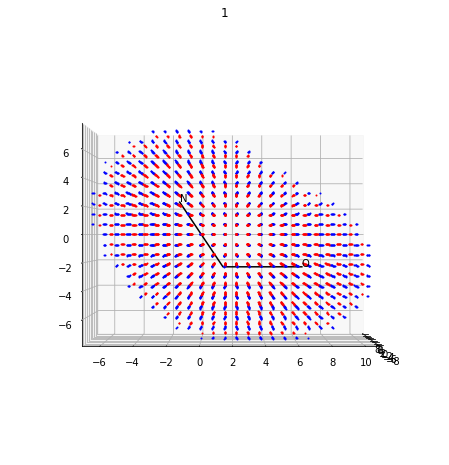

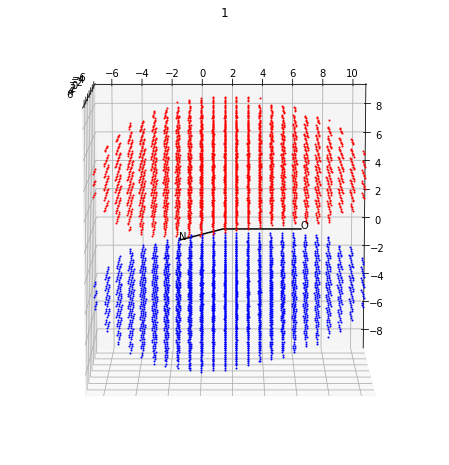

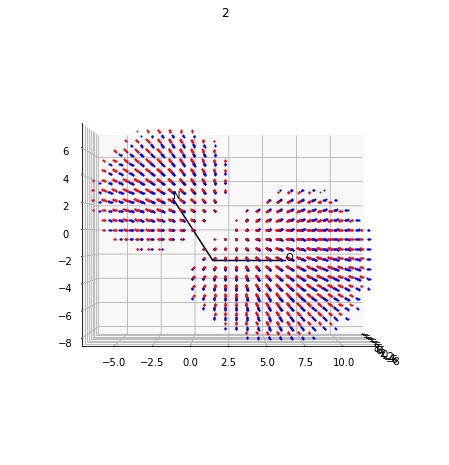

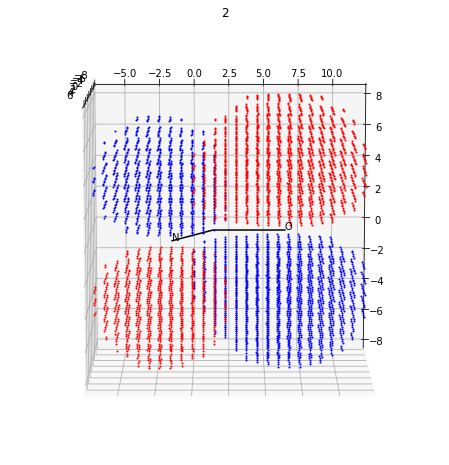

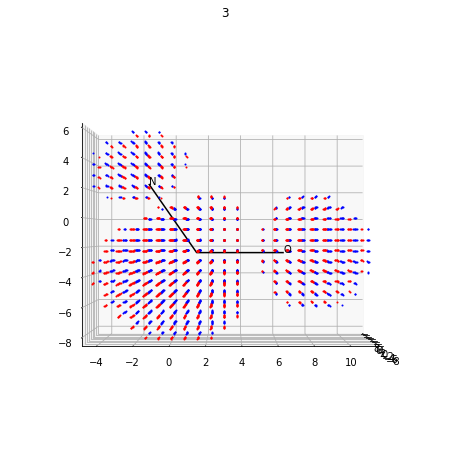

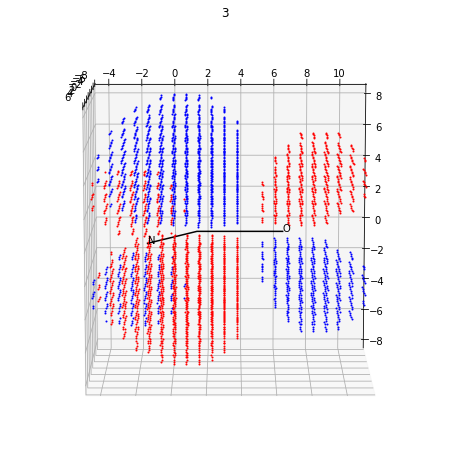

In [2]:
# Methanamide - 90% Plot

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.special import sph_harm
import math
%matplotlib inline

n = 1
l = 0
m = 0
Z = 1

# Constants
na = 6.02*np.power(10, 23)
h = 6.63/np.power(10, 34)
c = 3*np.power(10, 8)
    
# Value of beta in jmol-1
beta_si = 230000
# Value of beta per molecule
beta = beta_si/na


# Radial distribution function
def  radial_distribution(r, n, l, Z_eff):
    rho = 2.0 * Z_eff * r / n    
    p = Z*r
    if n == 1  and l == 0 :
        return 2*(Z**1.5)*np.exp(-p)
    elif n == 2  and l == 0 :
         return ((Z/2)**1.5)*(2-p)*np.exp(-p/2)
    elif n == 2  and l == 1:
         return (1/(np.sqrt(3))*((Z/2)**1.5)*p*np.exp(-p/2))
    elif n == 3  and l == 0 :
         return (2/27)*((Z/3)**1.5)*(27-18*p+2*(p**2))*np.exp(-p/3)
    elif n == 3 and l == 1 :
         return (1/27)*((2*Z/3)**1.5)*p*(6-p)*np.exp(-p/3)
    elif n == 3  and l == 2 :
         return (4/(27*np.sqrt(10)))*((Z/3)**1.5)*(p**2)*np.exp(-p/3)

def  spherical_harmonics (theta, phi, l, m):
    if l == 0 :
        if m == 0 :
             # l = 0, m = 0 
            return np.sqrt ( 1.0 / ( 4 * np.pi))
    elif l == 1 :
         if m == 0 :
             # l = 1, m = 0 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.cos ( theta)
         if m == 1 :
             # l = 1, m = + 1 
            return np.sqrt (3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
             # l = 1, m = + 1 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.sin (phi)
    else:
         if m == 0 :
            return np.sqrt ( 5.0 / ( 16.0 * np.pi)) * ( 3.0 * (np.cos (theta) ** 2 ) -1.0 )
         if m == 1 :
            return np.sqrt ( 15.0 )/ ( 4.0 * np.pi) * np.cos (theta) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
            return np.sqrt ( 15.0 / ( 4.0 * np.pi )) * np.cos (theta) * np.sin (theta) * np.sin (phi)
         if m == 2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin ( theta) ** 2 ) * np.cos ( 2 * phi)
         if m == --2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin (theta) ** 2) * np.sin ( 2 * phi)

def f(x, y, z, n, l, m, Z_eff): 
        #Convert cartesian coordinate system to polar 
        r = np.sqrt (x * x + y * y + z * z)
        Z = 6-( 0.35 * 3 + 0.85 * 2 )
        theta = 0.0 
        phi = 0.0 
        if r> 0 :
            theta = np.arccos (z / r)
        if y == 0 :
             if x < 0 :
                phi = np.pi
        elif x * x + y * y> 0 :
            phi = np.sign (y) * np.arccos (x / np.sqrt (x * x + y * y))

        # Return the wavefunction of the orbital
        return (radial_distribution(r, n, l, Z_eff) * spherical_harmonics(theta, phi, l, m))

def methanamide(x, y, z, n, l, m, Z_eff):
    # Quantum numbers - carbon and oxygen
    n = 2
    l = 1
    m = 1
    Z_carbon = 6-(0.35*3 + 0.85*2)
    Z_oxygen = 8-(0.35*5 + 0.85*2)
    Z_nitrogen = 7-(0.35*4 + 0.85*2)
    c =[[0.4764413477541944, 0.5082342653133167, 0.717427051142902],
         [0.7490996229850627, 0.1925270920859455, -0.6338636080866031],
        [0.4602753491050806, -0.8394231652595507, 0.28899022930167234] ]  
    d_1 = (147.0 / 52.9)*2
    d_2 = (134.0 / 52.9)*2
    centre = [[(-d_1/4)-(d_2), d_1*np.sqrt(3)/4], [-d_1/4, d_1*np.sqrt(3)/4], [d_1/4, d_1*-np.sqrt(3)/4]]
  
    return c[orbital][2]*f(x, y+centre[2][0], z+centre[2][1], n, l, m, Z_nitrogen)+c[orbital][1]*f(x, y+centre[1][0], z+centre[1][1], n, l, m, Z_carbon)+c[orbital][0]*f(x, y+centre[0][0], z+centre[0][1], n, l, m, Z_oxygen)


for orbital in range (3):
    
    # Lists for positive data
    x_pos_list = []
    y_pos_list = []
    z_pos_list = []

    # Lists for negative data
    x_neg_list = []
    y_neg_list = []
    z_neg_list = []

    data = []

    N = 40
    spread = 15
    space = 2*spread/N
    prob = 0.0

    for i in range (N):
        for j in range (N):
            for k in range (N):
                
                x = i*space-spread
                y = j*space-spread
                z = k*space-spread
                f_1 = methanamide(x, y, z, n, l, m, Z)
                # Probability distribution function
                f_2 = f_1**2
                data.append([f_2,x,y,z,f_1])
                prob = prob+f_2*space**3
    data = sorted(data, key =lambda data: data[0], reverse=True)
    total = 0.0
    i = 0
    while total<0.9*prob:
        x = data[i][1]
        y = data[i][2]
        z = data[i][3]
        total = total+(data[i][0])*space**3
        if data[i][4] >0:
            x_pos_list.append (x)
            y_pos_list.append (y)
            z_pos_list.append (z)
        else:
            x_neg_list.append (x)
            y_neg_list.append (y)
            z_neg_list.append (z) 
        i = i+1


    # Positive values
    Xpos = np.array (x_pos_list)
    Ypos = np.array (y_pos_list)
    Zpos = np.array (z_pos_list)

    # Negative values
    Xneg = np.array (x_neg_list)
    Yneg = np.array (y_neg_list)
    Zneg = np.array (z_neg_list)

    
    for o in range (2):
        fig = plt.figure (figsize = ( 8.0 , 8.0 ))
        ax = fig.add_subplot ( 1 , 1 , 1 , projection = '3d' )

        x_range = spread
        ax.set_xlim3d (-x_range, x_range)
        ax.set_ylim3d (-x_range, x_range)
        ax.set_zlim3d (-x_range, x_range)
        # Plotting the sigma framework
        d_1 = (147.0 / 52.9)*2
        d_2 = (134.0 / 52.9)*2
        centre = [[-d_1/4, d_1*np.sqrt(3)/4], [d_1/4, d_1*-np.sqrt(3)/4], [d_2+(d_1/4), d_1*-np.sqrt(3)/4]]
        x = []
        y = []
        z = []
        for i in range(3):
            x.append(0)
            y.append(centre[i][0])
            z.append(centre[i][1])
        ax.text(0, centre[2][0], centre[2][1], 'O', None)
        ax.text(0, centre[0][0], centre[0][1], 'N', None)
        ax.plot3D(x, y, z, 'black')

        # Finding the max and min values for each axis in order to scale the axes
        ymin = min(min(Ypos), min(Yneg))
        ymax = max(max(Ypos), max(Yneg))
        zmin = min(min(Zpos), min(Zneg))
        zmax = max(max(Zpos), max(Zneg))

        ax.set_xlim3d (max(max(Xpos), max(Xneg)), min(min(Xpos), min(Xneg)))
        ax.set_ylim3d (ymin, ymax)
        ax.set_zlim3d (zmin, zmax)
        ax.title.set_text("{}".format(orbital+1, 'π'))

        # Plot negative values in blue
        ax.plot(Xneg,Yneg,Zneg, color = 'b' , marker = "o", markersize=1, linestyle = 'None' )

        # Plot positive values in red
        ax.plot(Xpos,Ypos,Zpos, color = 'r' , marker = "o", markersize=1, linestyle = 'None' )
        if o == 0:
            ax.view_init(0, 0)
        else:
            ax.view_init(100, 0)
        plt.show()


In contrast to every other element considered, the lone pairs in chlorine exist in 3p orbitals. Therefore, the principle quantum number for the chlorine p orbital becomes 3. 

In [3]:
#Program to output Hückel coefficients
import numpy as np
import numpy.linalg

atoms = 3
matrix = [[1,1,0],[1,0,0.4],[0,0.4,2]]
matrix = np.matrix(matrix)  
energy, eigvec = numpy.linalg.eig(matrix)
eigvec = eigvec.tolist()

coefficient = [0] * atoms
for x in range (atoms):
    coefficient[x] = [0] * atoms 
for i in range (0,atoms):
    for j in range (0,atoms):
        coefficient[i][j] = eigvec[j][i]
coefficient = np.matrix(coefficient)
print('Energies:', energy)
print('Coefficients:', coefficient)

Energies: [-0.66184826  1.53310664  2.12874163]
Coefficients: [[-0.51136989  0.84981917 -0.12770362]
 [-0.81846272 -0.43632791  0.37381376]
 [ 0.26195345  0.29567776  0.91867026]]


$$
E_1= α+2.13 β , ψ_1=0.26χ_1+0.30χ_2+0.92χ_3
$$
$$
E_2= α+1.53 β,ψ_2=-0.82χ_1-0.44χ_2+0.37χ_3
$$
$$
E_3= α-0.66β,ψ_3=-0.51χ_1+0.85χ_2-0.12χ_3
$$

Below are the plots of these molecular orbitals:

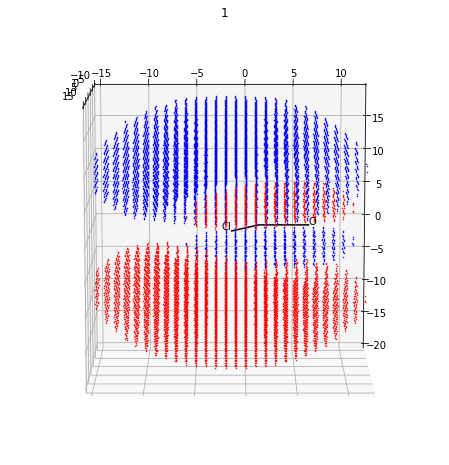

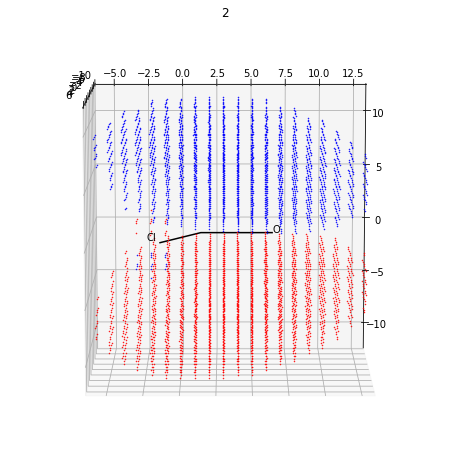

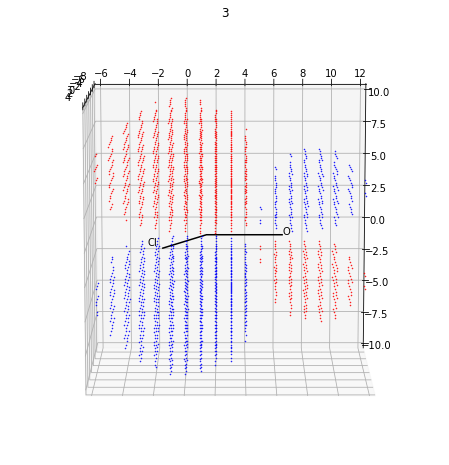

In [4]:
# Methoyl Chloride - 90% Plot

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.special import sph_harm
import math
%matplotlib inline

n = 1
l = 0
m = 0
Z = 1

# Constants
na = 6.02*np.power(10, 23)
h = 6.63/np.power(10, 34)
c = 3*np.power(10, 8)
    
# Value of beta in jmol-1
beta_si = 230000
# Value of beta per molecule
beta = beta_si/na


# Radial distribution function
def  radial_distribution(r, n, l, Z_eff):
    rho = 2.0 * Z_eff * r / n    
    p = Z*r
    if n == 1  and l == 0 :
        return 2*(Z**1.5)*np.exp(-p)
    elif n == 2  and l == 0 :
         return ((Z/2)**1.5)*(2-p)*np.exp(-p/2)
    elif n == 2  and l == 1:
         return (1/(np.sqrt(3))*((Z/2)**1.5)*p*np.exp(-p/2))
    elif n == 3  and l == 0 :
         return (2/27)*((Z/3)**1.5)*(27-18*p+2*(p**2))*np.exp(-p/3)
    elif n == 3 and l == 1 :
         return (1/27)*((2*Z/3)**1.5)*p*(6-p)*np.exp(-p/3)
    elif n == 3  and l == 2 :
         return (4/(27*np.sqrt(10)))*((Z/3)**1.5)*(p**2)*np.exp(-p/3)

def  spherical_harmonics (theta, phi, l, m):
    if l == 0 :
        if m == 0 :
             # l = 0, m = 0 
            return np.sqrt ( 1.0 / ( 4 * np.pi))
    elif l == 1 :
         if m == 0 :
             # l = 1, m = 0 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.cos ( theta)
         if m == 1 :
             # l = 1, m = + 1 
            return np.sqrt (3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
             # l = 1, m = + 1 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.sin (phi)
    else:
         if m == 0 :
            return np.sqrt ( 5.0 / ( 16.0 * np.pi)) * ( 3.0 * (np.cos (theta) ** 2 ) -1.0 )
         if m == 1 :
            return np.sqrt ( 15.0 )/ ( 4.0 * np.pi) * np.cos (theta) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
            return np.sqrt ( 15.0 / ( 4.0 * np.pi )) * np.cos (theta) * np.sin (theta) * np.sin (phi)
         if m == 2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin ( theta) ** 2 ) * np.cos ( 2 * phi)
         if m == --2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin (theta) ** 2) * np.sin ( 2 * phi)

def f(x, y, z, n, l, m, Z_eff): 
        #Convert cartesian coordinate system to polar 
        r = np.sqrt (x * x + y * y + z * z)
        Z = 6-( 0.35 * 3 + 0.85 * 2 )
        theta = 0.0 
        phi = 0.0 
        if r> 0 :
            theta = np.arccos (z / r)
        if y == 0 :
             if x < 0 :
                phi = np.pi
        elif x * x + y * y> 0 :
            phi = np.sign (y) * np.arccos (x / np.sqrt (x * x + y * y))

        # Return the wavefunction of the orbital
        return (radial_distribution(r, n, l, Z_eff) * spherical_harmonics(theta, phi, l, m))

def methoyl_chloride(x, y, z, n, l, m, Z_eff):
    # Quantum numbers - carbon and oxygen
    n = 2
    l = 1
    m = 1
    # Quantum numbers - chlorine
    nc = 3
    lc = 1
    mc = 1
    Z_carbon = 6-(0.35*3 + 0.85*2)
    Z_oxygen = 8-(0.35*5 + 0.85*2)
    Z_chlorine = 17-(0.35*6 + 0.85*8 + 1*2)
    c =[
        [0.26195344579513963, 0.29567775824099723, 0.9186702648489452],
         [-0.8184627209576746, -0.4363279102197919, 0.37381376267573224],
        [-0.5113698921901961, 0.8498191678497299, -0.12770362295792526],
         ]
    d_1 = (147.0 / 52.9)*2
    d_2 = (134.0 / 52.9)*2
    centre = [[(-d_1/4)-(d_2), d_1*np.sqrt(3)/4], [-d_1/4, d_1*np.sqrt(3)/4], [d_1/4, d_1*-np.sqrt(3)/4]]
    return c[orbital][2]*f(x, y+centre[2][0], z+centre[2][1], nc, lc, mc, Z_chlorine)+c[orbital][1]*f(x, y+centre[1][0], z+centre[1][1], n, l, m, Z_carbon)+c[orbital][0]*f(x, y+centre[0][0], z+centre[0][1], n, l, m, Z_oxygen)


for orbital in range (3):
    
    # Lists for positive data
    x_pos_list = []
    y_pos_list = []
    z_pos_list = []

    # Lists for negative data
    x_neg_list = []
    y_neg_list = []
    z_neg_list = []

    data = []

    N = 40
    spread = 20
    space = 2*spread/N
    prob = 0.0

    for i in range (N):
        for j in range (N):
            for k in range (N):
                
                x = i*space-spread
                y = j*space-spread
                z = k*space-spread
                f_1 = methoyl_chloride(x, y, z, n, l, m, Z)
                # Probability distribution function
                f_2 = f_1**2
                data.append([f_2,x,y,z,f_1])
                prob = prob+f_2*space**3
    data = sorted(data, key =lambda data: data[0], reverse=True)
    total = 0.0
    i = 0
    while total<0.9*prob:
        x = data[i][1]
        y = data[i][2]
        z = data[i][3]
        total = total+(data[i][0])*space**3
        if data[i][4] >0:
            x_pos_list.append (x)
            y_pos_list.append (y)
            z_pos_list.append (z)
        else:
            x_neg_list.append (x)
            y_neg_list.append (y)
            z_neg_list.append (z) 
        i = i+1


    # Positive values
    Xpos = np.array (x_pos_list)
    Ypos = np.array (y_pos_list)
    Zpos = np.array (z_pos_list)

    # Negative values
    Xneg = np.array (x_neg_list)
    Yneg = np.array (y_neg_list)
    Zneg = np.array (z_neg_list)
    
    fig = plt.figure (figsize = ( 8.0 , 8.0 ))
    ax = fig.add_subplot ( 1 , 1 , 1 , projection = '3d' )
    
    x_range = spread
    ax.set_xlim3d (-x_range, x_range)
    ax.set_ylim3d (-x_range, x_range)
    ax.set_zlim3d (-x_range, x_range)

    # Plotting the sigma framework
    d_1 = (147.0 / 52.9)*2
    d_2 = (134.0 / 52.9)*2
    centre = [[-d_1/4, d_1*np.sqrt(3)/4], [d_1/4, d_1*-np.sqrt(3)/4], [d_2+(d_1/4), d_1*-np.sqrt(3)/4]]
    x = []
    y = []
    z = []
    for i in range(3):
        x.append(0)
        y.append(centre[i][0])
        z.append(centre[i][1])
    ax.text(0, centre[2][0], centre[2][1], 'O', None)
    ax.text(0, centre[0][0]-1, centre[0][1]-1, 'Cl', None)
    ax.plot3D(x, y, z, 'black')
    
    # Finding the max and min values for each axis in order to scale the axes
    ymin = min(min(Ypos), min(Yneg))
    ymax = max(max(Ypos), max(Yneg))
    zmin = min(min(Zpos), min(Zneg))
    zmax = max(max(Zpos), max(Zneg))
    
    ax.set_xlim3d (max(max(Xpos), max(Xneg)), min(min(Xpos), min(Xneg)))
    ax.set_ylim3d (ymin, ymax)
    ax.set_zlim3d (zmin, zmax)
    ax.title.set_text("{}".format(orbital+1, 'π'))
    
    # Plot negative values in blue
    ax.plot(Xneg,Yneg,Zneg, color = 'b' , marker = "o", markersize=0.5, linestyle = 'None' )

    # Plot positive values in red
    ax.plot(Xpos,Ypos,Zpos, color = 'r' , marker = "o", markersize=0.5, linestyle = 'None' )

    ax.view_init(100, 0)
    
plt.show()

The conjugated systems in both molecules contain four electrons total: one from the oxygen atom, one from the carbon atom and two electrons from the lone pair on either nitrogen or chlorine[<sup>1</sup>](#fn1). The 1π and 2π orbitals are filled, while the 3π molecular orbital is the LUMO into which electrons are donated.

Upon comparison, we can see that the LUMO of methoyl chloride is $0.82β-0.66β = 0.16β$ lower in energy than the LUMO of methanamide. As the HOMO of the nucleophile is lower in energy than the LUMO[<sup>2</sup>](#fn2) of the electrophile, a lower energy LUMO leads to a smaller HOMO-LUMO energy gap, and a stronger interaction, and a much faster reaction. The diagram below shows us that methoyl chloride will have much stronger interactions with nucleophiles than methanamide, accounting for the difference in reactivity.


<span id="fn1"> 1: While each chlorine atom contains three lone pairs, only on of these lone pairs lies in a 3p orbital parallel to the others in the conjugated system.</span>

<span id="fn2"> 2: The HOMO of the nucleophile necessarily lower than LUMO of the electrophile. If the HOMO of the nucleophile was higher in energy than the LUMO of the electrophile, the electrons occupying the nucleophile HOMO would move to the LUMO of the electrophile.</span>